# 1. **Trabalho Prático II - Escolas Rurais Conectadas**

# 2. Membros
*   Arthur Araújo Comarelli Salles - 2019027300
*   Gabriel de Oliveira Andrade - 2019027520
*   Giovanni Martins de Sá Júnior - 2017001850
*   Yuri Júnior da Silva Adriano - 2019028233

# 3. Descrição dos dados

**Link do dataset escolhido:** https://dados.gov.br/dataset/escolas-rurais-conectadas


**O processo de escolha do datasheet**

*   O processo de escolha do datasheet foi baseado em uma determinação inicial do trabalho, na qual a escolha do tema se basearia em um dos datasets listados no domínio de dados do Governo Federal(dados.gov.br/dataset). Dessa maneira, dentre todos os conjuntos de dados listados, o grupo optou em escolher o denominado "Escolas Rurais Conectadas", que lista escolas públicas de estados brasileiros que apresentam acesso a Internet.

**Disposição Inicial de Dados**

*   Os dados encontrados estavam em um único arquivo csv que continha os seguintes parâmetros: NomePrestador, CodINEP, SiglaUF, NomeMunicipio, DescSituação, TipoObrigação, VelAcessoInstalada, DescTecnologia, NomeEscola, DescTipoEscola e DataAtivação.

**Processamento dos dados**

*   Primeiramente foi feita a divisão teórica da tabela única em tabelas para cada entidade e relacionamento, caso necessário. Em seguida, foi feita a adição de IDs para as entidades que não tinham esse atributo e foi adicionado, também atributos para que o projeto estivesse de acordo com as especificações do trabalho. Por fim foram feitas essas tabelas para cada entidade e relacionamento, gerando 5 arquivos csv que correspondem as tabelas presentes no diagrama ER abaixo.



# 4. Diagrama ER
*   Segue abaixo a representação do Diagrama Relacional desenvolvido na primeira parte do trabalho, através do software *Miro*. Um detalhe importante no esquemático abaixo, é representado pelos relacionametos em **negrito**, que denotam obrigatoriedade.
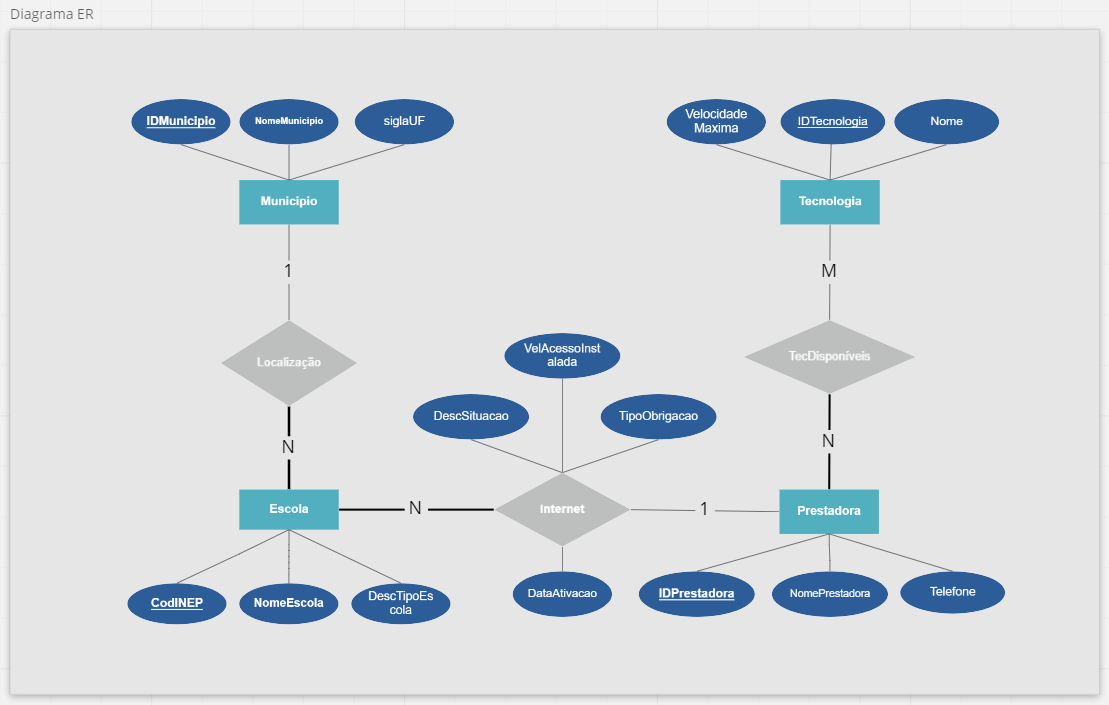

# 5. Diagrama relacional
*   Além do Diagrama de Entidade e Relacionamento, foi desenvolvido também o Diagrama Relacional, também desenvolvido utilizando a ferramenta *Miro*. Vale salientar também que este diagrama já estava presente na primeira parte do presente trabalho.
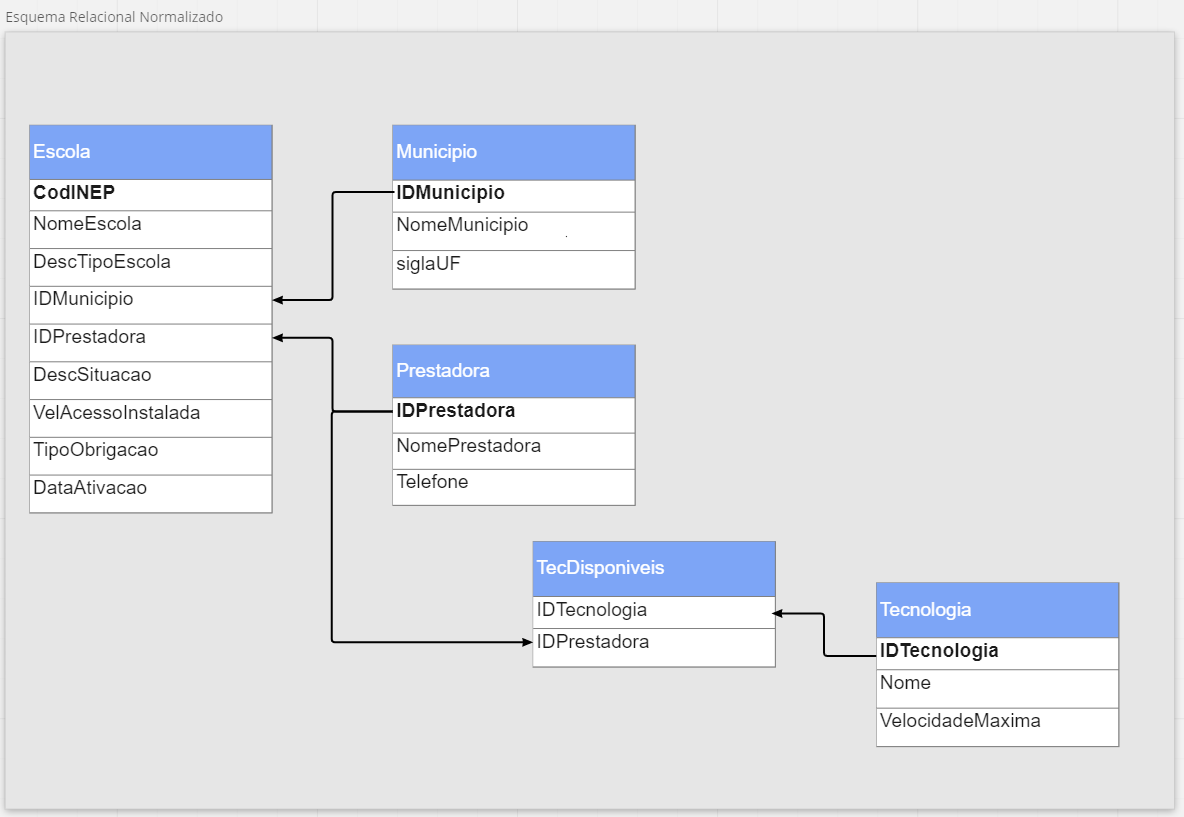

In [ ]:
#Isso é só pra ajudar a gente a fazer as cosias

# mysql("""
# SELECT * 

# FROM 
#  Escola E NATURAL JOIN TecDisponiveis TD NATURAL JOIN Tecnologia T NATURAL JOIN Municipio M NATURAL JOIN Prestadora P
# limit
# 3000
# """
# )
mysql("PRAGMA	cache_size	=	0")

# 6. Consultas

In [ ]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=f492f703c9aa16a841b0e0156946b40f842ae1fbe30b49e90cf0fc7bb7455b21
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import io
import sqlite3
import pandas as pd
from pandasql import sqldf

!git clone https://github.com/Ga-ol-an/Database_Introdution_Discipline.git

Cloning into 'Database_Introdution_Discipline'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 1), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
data = pd.read_csv ("/content/Database_Introdution_Discipline/Escola.csv", encoding='utf-8', sep=',')  
Escola = pd.DataFrame(data)

data = pd.read_csv ("/content/Database_Introdution_Discipline/Municipio.csv", encoding='utf-8', sep=',')   
Municipio = pd.DataFrame(data)

data = pd.read_csv ("/content/Database_Introdution_Discipline/Prestadora.csv", encoding='iso-8859-1', sep=',')  
Prestadora = pd.DataFrame(data)

data = pd.read_csv ("/content/Database_Introdution_Discipline/TecDisponiveis.csv", encoding='utf-8', sep=',')   
TecDisponiveis = pd.DataFrame(data)

data = pd.read_csv ("/content/Database_Introdution_Discipline/Tecnologia.csv", encoding='iso-8859-1', sep=',')   
Tecnologia = pd.DataFrame(data)


mysql = lambda q: sqldf(q, globals())

#Exemplo de consulta:
# mysql("""
# SELECT *
# FROM Escola
# """)


## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)

Nome, código  e velocidade de acesso de escolas com velocidade de acesso instalada maior que 1Mbps e que tenha sido informada.

In [ ]:
%timeit
mysql("""
SELECT NomeEscola, CodINEP, VelAcessoInstalada
FROM Escola WHERE 
VelAcessoInstalada > "1 Mbps" AND VelAcessoInstalada != "n?o informado"
""") 


,NomeEscola,CodINEP,VelAcessoInstalada
0,EMUEF MARCELLINO BAPTISTA,32012748,2.96 Mbps
1,EMPEF AGUA BOA,32015038,2.17 Mbps
2,EMPEF LAPINHA,32015488,1.45 Mbps
3,EMUEF CORREGO SANTA RITA,32015739,2.97 Mbps
4,EMEF MARIO FLORENTINO,32016093,3.95 Mbps
...,...,...,...
3899,DORIVALDO DAMM PROFESSOR,35914927,4 Mbps
3900,MIGUEL PIRES GODINHO,35916699,2 Mbps
3901,FRANCA FRANCHI PROFA,35921579,5 Mbps
3902,BAIRRO TURVO DOS ALMEIDAS,35926036,4 Mbps


In [ ]:
%timeit
mysql("""
SELECT NomeEscola, CodINEP, VelAcessoInstalada
FROM Escola WHERE 
VelAcessoInstalada NOT IN (
                          SELECT VelAcessoInstalada
                          FROM Escola
                          WHERE VelAcessoInstalada <= "1 Mbps" OR VelAcessoInstalada = "n?o informado"
)
""") 

,NomeEscola,CodINEP,VelAcessoInstalada
0,EMUEF MARCELLINO BAPTISTA,32012748,2.96 Mbps
1,EMPEF AGUA BOA,32015038,2.17 Mbps
2,EMPEF LAPINHA,32015488,1.45 Mbps
3,EMUEF CORREGO SANTA RITA,32015739,2.97 Mbps
4,EMEF MARIO FLORENTINO,32016093,3.95 Mbps
...,...,...,...
3899,DORIVALDO DAMM PROFESSOR,35914927,4 Mbps
3900,MIGUEL PIRES GODINHO,35916699,2 Mbps
3901,FRANCA FRANCHI PROFA,35921579,5 Mbps
3902,BAIRRO TURVO DOS ALMEIDAS,35926036,4 Mbps


### 6.1.2 Consulta 2 (duas versões)

NomeEscola cuja DataAtivação não foi informada

In [ ]:
#OK (Réplica e Original)- Gab
%timeit
mysql("""
SELECT
   E.NomeEscola, E.DataAtivacao
FROM 
  Escola E
WHERE
  E.DataAtivacao = 'n?o informado'
""")

,NomeEscola,DataAtivacao
0,EMEF NOSSA SENHORA DE NAZARE,n?o informado
1,ESC MANUEL CEZARIO DE FARIAS,n?o informado
2,ESC NOVA ESPERANCA,n?o informado
3,ESC SAO JOAO,n?o informado
4,ESC JOSE PEREIRA LIMA,n?o informado
...,...,...
57,ESCOLA MUNICIPAL PROJETO PRODUZIR,n?o informado
58,ESC MUN DO BRAS,n?o informado
59,ESCOLA MUNICIPAL ALCIDES CARDOSO,n?o informado
60,ESCOLA MUNICIPAL DO BERNADO,n?o informado


In [ ]:
%timeit
mysql("""
SELECT
   E.NomeEscola, E.DataAtivacao
FROM 
  Escola E
WHERE
  LENGTH(E.DataAtivacao) = 13
""")

,NomeEscola,DataAtivacao
0,EMEF NOSSA SENHORA DE NAZARE,n?o informado
1,ESC MANUEL CEZARIO DE FARIAS,n?o informado
2,ESC NOVA ESPERANCA,n?o informado
3,ESC SAO JOAO,n?o informado
4,ESC JOSE PEREIRA LIMA,n?o informado
...,...,...
57,ESCOLA MUNICIPAL PROJETO PRODUZIR,n?o informado
58,ESC MUN DO BRAS,n?o informado
59,ESCOLA MUNICIPAL ALCIDES CARDOSO,n?o informado
60,ESCOLA MUNICIPAL DO BERNADO,n?o informado


## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)

Selecione o NomeEscola, VelAcessoInstalado das escolas cuja a prestadora seja a CLARO

In [ ]:
#OK (Réplica e Original)- Gab 
%timeit
mysql(""" 
SELECT DISTINCT
  E.NomeEscola, E.VelAcessoInstalada
FROM 
  Escola E NATURAL JOIN Prestadora P
WHERE 
  P.NomePrestadora = "CLARO"
ORDER BY
  E.VelAcessoInstalada
""")

,NomeEscola,VelAcessoInstalada
0,ESCOLA FREDERICO RODRIGUES DE OLIVEIRA,0 Mbps
1,ESCOLA JOSE ALVES SOBRINHO,0 Mbps
2,ESCOLA MUNICIPAL JOSE HERCULANO DIAS,0 Mbps
3,ESCOLA MUNICIPAL LIBERATO RODRIGUES MONTALVAO,0.00043 Mbps
4,ESCOLA MUNICIPAL MADRE JOANA ANGELICA,0.00049 Mbps
...,...,...
6754,WALTER FRIEDRICH EMEFEI,n?o informado
6755,WALTER PASSAGLI EMEI,n?o informado
6756,ZILAH BARRETO PACITTI PROFESSORA,n?o informado
6757,ZILDA PADOVANI MULLER CEMEI,n?o informado


In [ ]:
%timeit
mysql("""
SELECT DISTINCT
  E.NomeEscola, E.VelAcessoInstalada
FROM 
  Escola E NATURAL JOIN Prestadora P
WHERE 
  P.NomePrestadora != "50417424566" AND
  P.NomePrestadora != "OI" AND
  P.NomePrestadora != "TELEFÔNICA"
ORDER BY
  E.VelAcessoInstalada
""")

,NomeEscola,VelAcessoInstalada
0,ESCOLA FREDERICO RODRIGUES DE OLIVEIRA,0 Mbps
1,ESCOLA JOSE ALVES SOBRINHO,0 Mbps
2,ESCOLA MUNICIPAL JOSE HERCULANO DIAS,0 Mbps
3,ESCOLA MUNICIPAL LIBERATO RODRIGUES MONTALVAO,0.00043 Mbps
4,ESCOLA MUNICIPAL MADRE JOANA ANGELICA,0.00049 Mbps
...,...,...
6754,WALTER FRIEDRICH EMEFEI,n?o informado
6755,WALTER PASSAGLI EMEI,n?o informado
6756,ZILAH BARRETO PACITTI PROFESSORA,n?o informado
6757,ZILDA PADOVANI MULLER CEMEI,n?o informado


### 6.2.2 Consulta 4 (duas versões)

Selecione o CodigoINEP das escolas e o NomeMunicipio correspondente cuja Operadora seja a 'CLARO' e a DataInstação ocorreu em 15/05/2015

In [ ]:
%timeit
mysql("""
SELECT E.CodINEP, M.NomeMunicipio
FROM
 Escola E NATURAL JOIN Municipio M  NATURAL JOIN Prestadora P 
WHERE
 P.NomePrestadora = "CLARO" AND E.DataAtivacao = "15/05/2015"
""")

,CodINEP,NomeMunicipio
0,15147720,Tracuateua
1,15588505,Curu??
2,17005752,Aragua?na
3,21009597,S?o Jos? de Ribamar
4,21023255,Icatu
5,21087296,Governador Newton Bello
6,21105596,Olho d'?gua das Cunh?s
7,21335826,Fernando Falc?o
8,29416817,Muritiba
9,35244168,Bom Jesus dos Perd?es


In [ ]:
%timeit
mysql("""
SELECT E.CodINEP, M.NomeMunicipio
FROM
 Escola E NATURAL JOIN Municipio M  NATURAL JOIN Prestadora P 
WHERE
 E.CodINEP NOT IN (
                    SELECT E.CodINEP
                    FROM Escola E NATURAL JOIN Municipio M  NATURAL JOIN Prestadora P 
                    WHERE P.NomePrestadora != "CLARO" OR E.DataAtivacao != "15/05/2015"
 )
""")

,CodINEP,NomeMunicipio
0,15147720,Tracuateua
1,15588505,Curu??
2,17005752,Aragua?na
3,21009597,S?o Jos? de Ribamar
4,21023255,Icatu
5,21087296,Governador Newton Bello
6,21105596,Olho d'?gua das Cunh?s
7,21335826,Fernando Falc?o
8,29416817,Muritiba
9,35244168,Bom Jesus dos Perd?es


### 6.2.3 Consulta 5 (duas versões)

Selecionar NomePrestadora que pode consegue fornecer internet usando ADSL como tecnologia

In [ ]:
%timeit
mysql("""
SELECT DISTINCT P.NomePrestadora
FROM 
 Prestadora P NATURAL JOIN TecDisponiveis TD NATURAL JOIN Tecnologia T
WHERE
 T.Nome = "ADSL"
"""
)

,NomePrestadora
0,OI
1,TELEFÔNICA


In [ ]:
%timeit
mysql("""
SELECT DISTINCT P.NomePrestadora
FROM 
 Prestadora P NATURAL JOIN TecDisponiveis TD NATURAL JOIN Tecnologia T
WHERE
  T.Nome != "SATÉLITE" AND
  T.Nome != "Rede Celular" AND
  T.Nome != "HDSL" 
"""
)

,NomePrestadora
0,OI
1,TELEFÔNICA


## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

#####Retornar UF,NomeEscola, NomeTecnologia e VelAcessoInstalada da escola com maior VelocidadeInstalada de cada estado da Região Sul



In [ ]:
%timeit
mysql("""
SELECT
   M.siglaUF, E.NomeEscola, T.Nome, MAX(E.VelAcessoInstalada) VelAcesso
FROM
   Escola E NATURAL JOIN TecDisponiveis TD NATURAL JOIN Tecnologia T NATURAL JOIN Municipio M
WHERE 
  E.VelAcessoInstalada != 'n?o informado' AND
  M.siglaUF IN ("PR","SC","RS")
GROUP BY
  M.siglaUF
ORDER BY 
  E.VelAcessoInstalada
DESC
""")

,SiglaUF,NomeEscola,Nome,VelAcesso
0,PR,DOCE FINO C E C DE EF M,SATÉLITE,9.88 Mbps
1,SC,CENTRO DE EDUCACAO INFANTIL SOSSEGO DA MAMAE,SATÉLITE,9.87 Mbps
2,RS,SIMAO JORGE SIRIANO EEF,SATÉLITE,8.94 Mbps


In [ ]:
%timeit
mysql("""
SELECT
   M.siglaUF, E.NomeEscola, T.Nome, MAX(E.VelAcessoInstalada)
FROM
   Escola E NATURAL JOIN TecDisponiveis TD NATURAL JOIN Tecnologia T NATURAL JOIN Municipio M
WHERE 
   E.CodINEP IN (
        SELECT
             Esc.CodINEP  
        FROM 
          Escola Esc  
        WHERE 
          Esc.VelAcessoInstalada != 'n?o informado' ) AND
      (M.siglaUF == "PR" OR M.siglaUF == "SC" OR M.siglaUF == "RS")
GROUP BY 
   M.siglaUF
ORDER BY 
  E.VelAcessoInstalada
DESC
""")

,SiglaUF,NomeEscola,Nome,MAX(E.VelAcessoInstalada)
0,PR,DOCE FINO C E C DE EF M,SATÉLITE,9.88 Mbps
1,SC,CENTRO DE EDUCACAO INFANTIL SOSSEGO DA MAMAE,SATÉLITE,9.87 Mbps
2,RS,SIMAO JORGE SIRIANO EEF,SATÉLITE,8.94 Mbps


### 6.3.2 Consulta 7 (duas versões)

##### NomeEscola, NomeMunicipio e Nome da Prestadora de todas as escolas Estudais

In [ ]:
#OK (Réplica e Original)- Gab
%timeit
mysql("""
SELECT 
  E.NomeEscola, M.NomeMunicipio, P.NomePrestadora
FROM 
   Escola E NATURAL JOIN Prestadora P NATURAL JOIN Municipio M 
WHERE 
  E.DescTipoEscola == 'Estadual'
""")

,NomeEscola,NomeMunicipio,NomePrestadora
0,EEEF ITA,Barra de S?o Francisco,50417424566
1,EEEF ANTONIO CIRILO,Barra de S?o Francisco,50417424566
2,EEEF MONTE SENIR,Barra de S?o Francisco,50417424566
3,CEIER DE AGUIA BRANCA,?guia Branca,50417424566
4,CEIER - CENTRO ESTADUAL INTEGRADO DE EDUCACAO ...,Boa Esperan?a,50417424566
...,...,...,...
3250,ASSENTAMENTO SANTA CLARA,Mirante do Paranapanema,TELEFÔNICA
3251,BAIRRO TURVO DOS ALMEIDAS,Cap?o Bonito,TELEFÔNICA
3252,BAIRRO SERRA DO INDAIA,Cunha,TELEFÔNICA
3253,LAGEADO CCI DO,Botucatu,TELEFÔNICA


In [ ]:
%timeit
mysql("""
SELECT 
  E.NomeEscola, M.NomeMunicipio, P.NomePrestadora
FROM 
   Escola E NATURAL JOIN Prestadora P NATURAL JOIN Municipio M 
WHERE 
  E.CodINEP not in (SELECT CodInep FROM Escola WHERE DescTipoEscola != 'Estadual' )
""")

,NomeEscola,NomeMunicipio,NomePrestadora
0,EEEF ITA,Barra de S?o Francisco,50417424566
1,EEEF ANTONIO CIRILO,Barra de S?o Francisco,50417424566
2,EEEF MONTE SENIR,Barra de S?o Francisco,50417424566
3,CEIER DE AGUIA BRANCA,?guia Branca,50417424566
4,CEIER - CENTRO ESTADUAL INTEGRADO DE EDUCACAO ...,Boa Esperan?a,50417424566
...,...,...,...
3250,ASSENTAMENTO SANTA CLARA,Mirante do Paranapanema,TELEFÔNICA
3251,BAIRRO TURVO DOS ALMEIDAS,Cap?o Bonito,TELEFÔNICA
3252,BAIRRO SERRA DO INDAIA,Cunha,TELEFÔNICA
3253,LAGEADO CCI DO,Botucatu,TELEFÔNICA


### 6.3.3 Consulta 8 (duas versões)

UF e nome das escolas que estão nos estados da região sudeste que têm como provedora a Claro.

In [ ]:
%timeit
mysql("""
SELECT
   E.NomeEscola, M.SiglaUF
FROM
   Escola E NATURAL JOIN Prestadora P NATURAL JOIN Municipio M
WHERE 
  P.NomePrestadora = "CLARO" AND
  (M.SiglaUF = "ES" OR M.SiglaUF = "MG" OR M.SiglaUF = "SP" OR M.SiglaUF = "RJ")
""")

,NomeEscola,SiglaUF
0,ABILIO BETELLI EMEFEI,SP
1,ADAO DE LIMA EMEIF,SP
2,AGUA BRANCA EMEF,SP
3,AGUA COMPRIDA ESCOLA MUNICIPAL RURAL,SP
4,AGUAS DE IGARATA EMEIF,SP
...,...,...
316,WALDA PAOLINETTI LOZASSO EM,SP
317,WALTER FRIEDRICH EMEFEI,SP
318,WALTER PASSAGLI EMEI,SP
319,ZILAH BARRETO PACITTI PROFESSORA,SP


In [ ]:
%timeit
mysql("""
SELECT DISTINCT
   E.NomeEscola, M.SiglaUF
FROM
   Escola E NATURAL JOIN Prestadora P NATURAL JOIN Municipio M
WHERE 
   E.CodINEP IN(
      SELECT
            E.CodINEP
      FROM 
        Escola E NATURAL JOIN Municipio Mu NATURAL JOIN Prestadora Pr
      WHERE 
      Pr.NomePrestadora = "CLARO" AND
    (Mu.siglaUF = "ES" OR Mu.siglaUF = "MG" OR Mu.siglaUF = "SP" OR Mu.siglaUF = "RJ")
  )
  ORDER BY 
  E.NomeEscola
""")

,NomeEscola,SiglaUF
0,ABILIO BETELLI EMEFEI,SP
1,ADAO DE LIMA EMEIF,SP
2,AGUA BRANCA EMEF,SP
3,AGUA COMPRIDA ESCOLA MUNICIPAL RURAL,SP
4,AGUAS DE IGARATA EMEIF,SP
...,...,...
315,WALDA PAOLINETTI LOZASSO EM,SP
316,WALTER FRIEDRICH EMEFEI,SP
317,WALTER PASSAGLI EMEI,SP
318,ZILAH BARRETO PACITTI PROFESSORA,SP


## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)

Encontrar o número de Escolas Presentes em cada estado da Região Centro-Oeste

In [ ]:
%timeit
mysql("""
SELECT
    M.siglaUF, COUNT(E.NomeEscola) Quantidade_Escolas
FROM
    Municipio M NATURAL JOIN Escola E
WHERE
    M.siglaUF IN ("MT", "MS", "GO", "DF")
GROUP BY
    M.siglaUF
""")

,SiglaUF,Quantidade_Escolas
0,DF,78
1,GO,534
2,MS,283
3,MT,700


In [ ]:
%timeit
mysql("""
SELECT
    M.siglaUF, COUNT(E.NomeEscola)
FROM
    Municipio M NATURAL JOIN Escola E
WHERE
    (M.siglaUF == "MT" OR M.siglaUF == "MS" OR M.siglaUF == "GO" OR M.siglaUF == "DF")
GROUP BY
    M.siglaUF
""")

,SiglaUF,COUNT(E.NomeEscola)
0,DF,78
1,GO,534
2,MS,283
3,MT,700


### 6.4.2 Consulta 10 (duas versões)

Encontrar o número de escolas que cada Operadora atende na região Norte do País, ordenando a quantidade de maneira decrescente.

In [ ]:
%timeit
mysql("""
SELECT
    P.NomePrestadora, COUNT(E.NomeEscola) Quantidade_Escolas
FROM 
    Prestadora P NATURAL JOIN Escola E NATURAL JOIN Municipio M
WHERE
    M.siglaUF IN ("AC", "AP", "AM", "PA", "RO", "RR", "TO")
GROUP BY
    P.NomePrestadora
ORDER BY
    Quantidade_Escolas
DESC
""")


,NomePrestadora,Quantidade_Escolas
0,CLARO,1885
1,TELEFÔNICA,155
2,OI,12


In [ ]:
%timeit
mysql("""
SELECT
    P.NomePrestadora, COUNT(E.NomeEscola) Quantidade_Escolas
FROM 
    Prestadora P NATURAL JOIN Escola E NATURAL JOIN Municipio M
WHERE
    (M.siglaUF == "AC" OR M.siglaUF == "AP" OR M.siglaUF == "AM" OR M.siglaUF == "PA" OR M.siglaUF == "RO" OR M.siglaUF == "RR" OR M.siglaUF == "TO")
GROUP BY
    P.NomePrestadora
ORDER BY
    Quantidade_Escolas
DESC
""")

,NomePrestadora,Quantidade_Escolas
0,CLARO,1885
1,TELEFÔNICA,155
2,OI,12


# 7. Autoavaliação dos membros


*   Arthur:<br>
  Conseguiu ajudar em todas as etapas do processo, realizando consultas de vários níveis de dificuldade, corrigindo alguma e também a separação da tabela original em tabelas separadas. Entregou as partes em que era responsável o mais rápido possível.

*   Gabriel: <br>
  Realizou as atividades requisitadas e ajudou montar a estrutura do trabalho. Se preocupou com a organização das queries, com o nível de dificuldade delas e em dividir o trabalho igualmente. Entregou o trabalho o mais rápido possível para permitir que os colegas o enviassem feedback, caso fosse necessário.

*   Giovanni: <br>
Participou de maneira ativa na duas etapas do trabalho final, desde a busca inicial do Banco a ser utilizado, na estruturação dos Diagramas ER e Relacional, na organização inicial do template do Google Collab, bem como implementou parte das consultas necessárias. 

*   Yuri: <br>
 Contribuiu em todas as etapas do projeto, desde da busca pelo banco de dados, suas modificações para se adequar aos requisitos do trabalho e também na criação das consultas. Deu feedback das tarefas que realizava e se mostrou disponivel para ajudar os demais integrantes caso necessitassem.

